<a href="https://colab.research.google.com/github/Addo-Agyekum/Addo-Agyekum/blob/main/7CS074_UZ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

<ipython-input-11-280104f53172>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


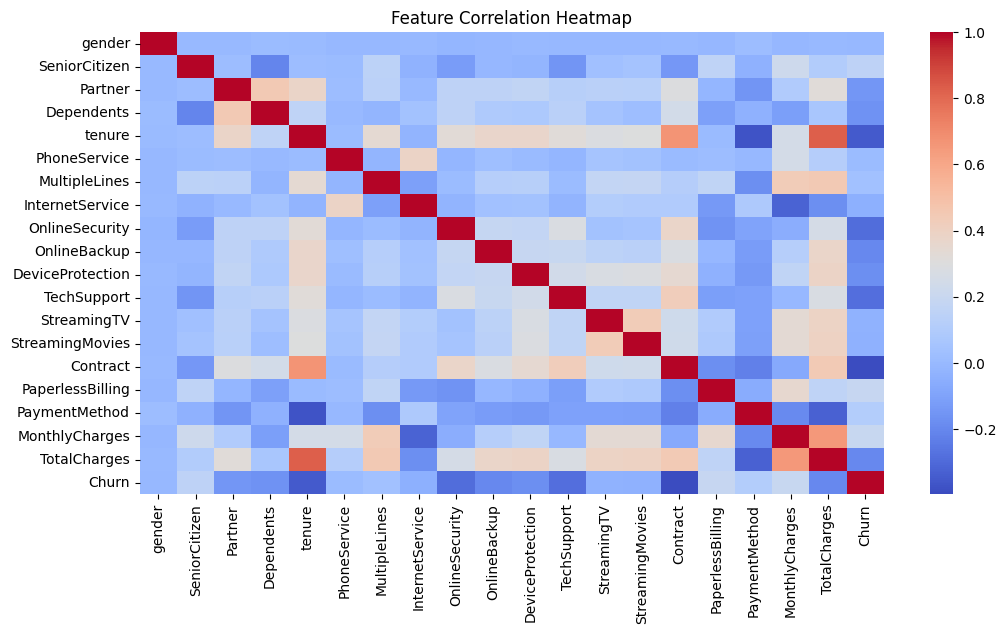


Top Features by Importance:
            Feature  Importance
18     TotalCharges    0.189992
17   MonthlyCharges    0.177867
4            tenure    0.157428
14         Contract    0.077357
16    PaymentMethod    0.050379
8    OnlineSecurity    0.047432
11      TechSupport    0.044190
0            gender    0.028117
9      OnlineBackup    0.027067
7   InternetService    0.026444


<ipython-input-11-280104f53172>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


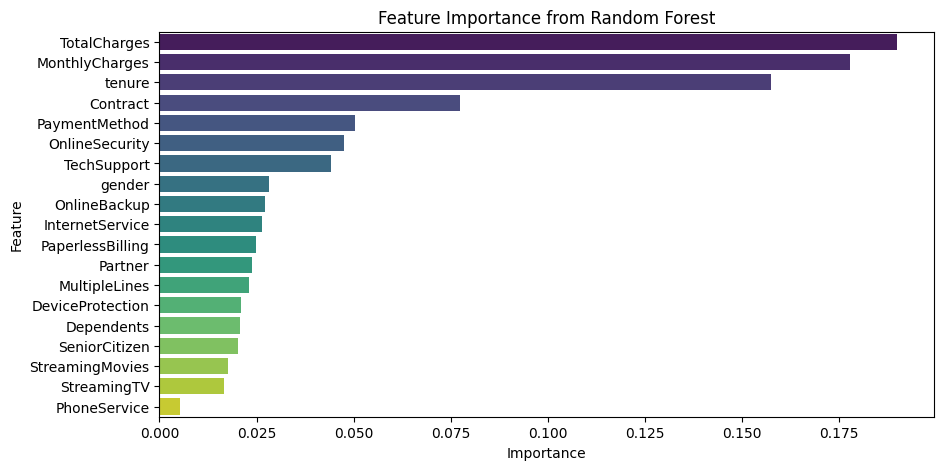

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Random Forest Accuracy: 0.7963
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Confusion Matrix:
[[946  90]
 [197 176]]

Decision Tree Accuracy: 0.7260
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion Matrix:
[[833 203]
 [183 190]]

KNN Accuracy: 0.7580
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.50      0.52       373

    accuracy  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


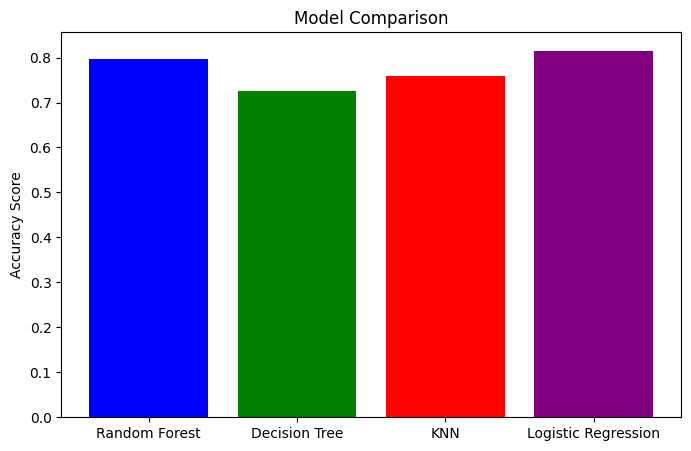

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Best Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



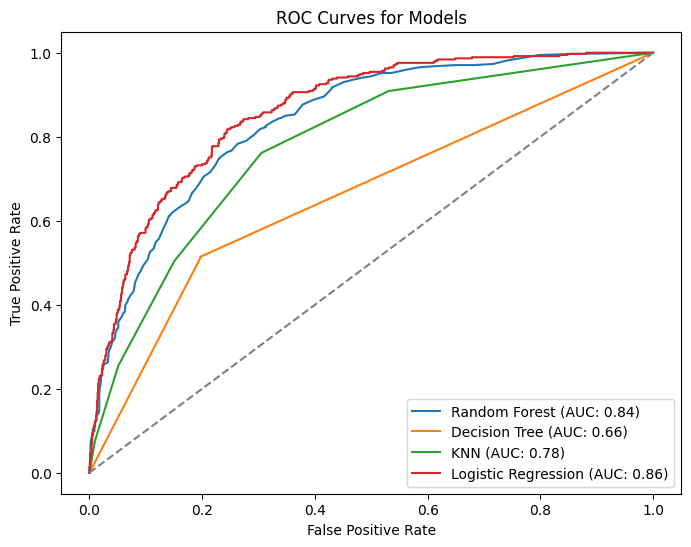

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display first few rows
print(df.head())

# Check missing values
print(df.isnull().sum())

# Convert TotalCharges to numeric (fix missing values)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Drop customerID (not useful for modeling)
df.drop(columns=["customerID"], inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = label_enc.fit_transform(df[col])

# Check correlation to select features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Split data into features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train back to DataFrame after scaling
X_train = pd.DataFrame(X_train, columns=X.columns)

# Feature Importance Analysis using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print and plot feature importance
print("\nTop Features by Importance:")
print(feature_importances.head(10))

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.show()

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Plot Model Performance
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "red", "purple"])
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.show()

# Hyperparameter tuning for RandomForest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_rf.predict(X_test)
print("\nBest Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best))

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC: {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()



Selected Features using RFE:
Index(['gender', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

Random Forest with RFE - Accuracy: 0.7999
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[939  97]
 [185 188]]


<ipython-input-12-3b82b0f6e338>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_rfe["Importance"], y=feature_importances_rfe["Feature"], palette="viridis")


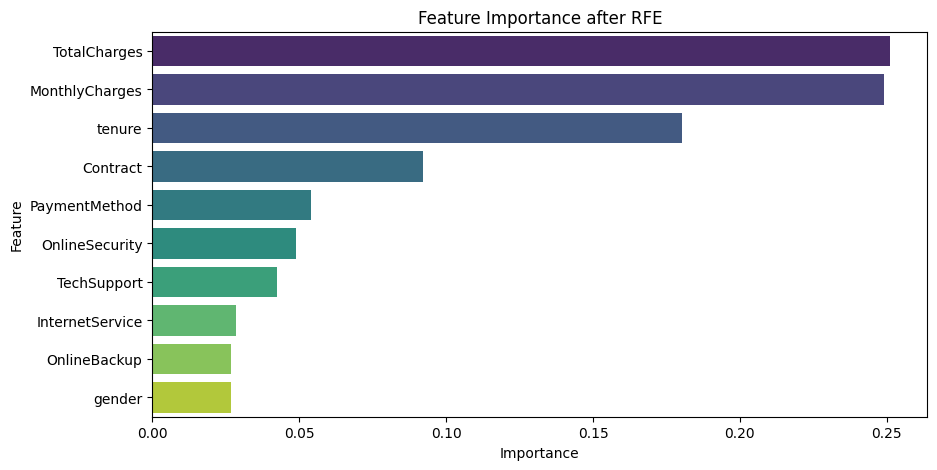

In [12]:
# Import RFE
from sklearn.feature_selection import RFE

# Create a RandomForest model for RFE
rf_rfe = RandomForestClassifier(n_estimators=100, random_state=42)

# Use RFE to select features
rfe = RFE(estimator=rf_rfe, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

print("\nSelected Features using RFE:")
print(selected_features)

# Convert X_train and X_test back to DataFrame after scaling
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Select the features based on RFE
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train Random Forest model with selected features
rf_rfe.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model
y_pred_rfe = rf_rfe.predict(X_test_rfe)

# Print evaluation metrics
print(f"\nRandom Forest with RFE - Accuracy: {accuracy_score(y_test, y_pred_rfe):.4f}")
print(classification_report(y_test, y_pred_rfe))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rfe)}")

# Feature importance after RFE
feature_importances_rfe = pd.DataFrame({'Feature': selected_features, 'Importance': rf_rfe.feature_importances_})
feature_importances_rfe = feature_importances_rfe.sort_values(by='Importance', ascending=False)

# Plot feature importance after RFE
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances_rfe["Importance"], y=feature_importances_rfe["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance after RFE")
plt.show()

##LOGISTIC REGRESSION AFTER RFE

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(log_reg, n_features_to_select=10)  # You can adjust the number of features
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features using RFE:")
print(selected_features)

# Transform train and test data
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

Selected Features using RFE:
Index(['tenure', 'PhoneService', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [14]:
# Train Logistic Regression with selected features
log_reg.fit(X_train_rfe, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_rfe)

# Evaluate model
print(f"\nLogistic Regression (RFE) - Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(classification_report(y_test, y_pred_log_reg))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_log_reg)}")



Logistic Regression (RFE) - Accuracy: 0.8162
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
[[930 106]
 [153 220]]


<ipython-input-15-eaee7ae12573>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_reg_coefficients["Abs_Coefficient"], y=log_reg_coefficients["Feature"], palette="viridis")


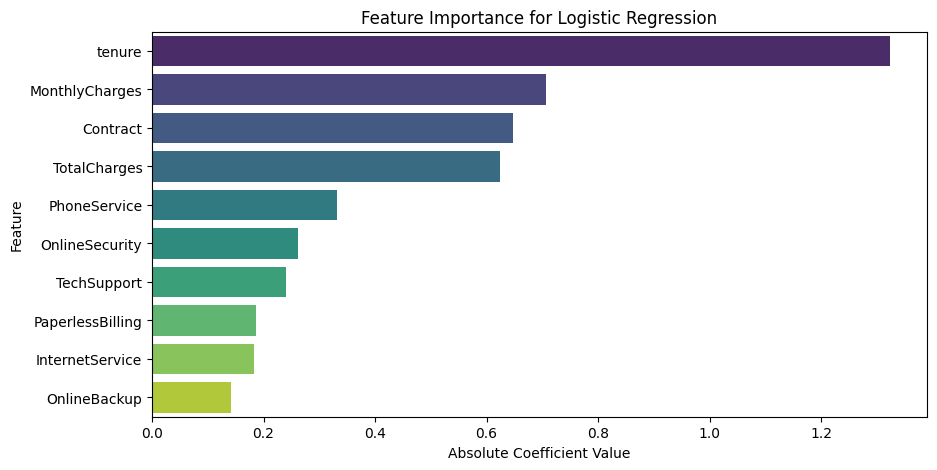

In [15]:
log_reg_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': log_reg.coef_[0]
})

# Sort by absolute value to find most important features
log_reg_coefficients["Abs_Coefficient"] = log_reg_coefficients["Coefficient"].abs()
log_reg_coefficients = log_reg_coefficients.sort_values(by="Abs_Coefficient", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=log_reg_coefficients["Abs_Coefficient"], y=log_reg_coefficients["Feature"], palette="viridis")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance for Logistic Regression")
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X_train_rfe, y_train, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

import numpy as np

n = len(y_test)
acc = accuracy_score(y_test, y_pred_best)
std_err = np.sqrt((acc * (1 - acc)) / n)  # Standard error
ci_low, ci_high = acc - 1.96 * std_err, acc + 1.96 * std_err  # 95% Confidence Interval

print(f"95% Confidence Interval for Accuracy: ({ci_low:.4f}, {ci_high:.4f})")



Cross-Validation Accuracy Scores: [0.81277728 0.80212955 0.78527063 0.78704525 0.79396092]
Mean CV Accuracy: 0.7962
95% Confidence Interval for Accuracy: (0.7827, 0.8242)
